# ANÁLISE 002 - ANÁLISES TEMPORAIS

Neste notebook concentraremoa as análises feitas no decorrer do tempo, utilizando os conceitos aprendidos nas disciplinas APRENDIZADO DINÂMICO (Profa. Cibele Russo) e APRENDIZADO DE MÁQUINA (Prof. André C.P.L.F. de Carvalho).

Vamos inicialmente abordar o conceito de **MÉDIA MÓVEL**, que tem sido divulgado diariamente pela mídia, para mostrar numa única visualização o número de casos e óbitos. Aplicaremos a análise a base de dados extraída do site do SEADE no notebook ANALISE 001, modificado previamente no excel (sem caracteres acentuados e extraindo apenas as colunas de interesse).

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

#dados_sp = pd.read_csv('dados_covid_sp_modif_old.csv',sep=';',parse_dates=True)
dados_sp = pd.read_excel('dados_covid_sp_modif.xlsx',parse_dates=True)
dados_sp

municipio       data  casos_novos  obitos_novos
0       AGUAS DA PRATA 2020-02-25            0             0
1       AGUAS DA PRATA 2020-02-26            0             0
2       AGUAS DA PRATA 2020-02-27            0             0
3       AGUAS DA PRATA 2020-02-28            0             0
4       AGUAS DA PRATA 2020-02-29            0             0
...                ...        ...          ...           ...
404410        ZACARIAS 2021-11-08            0             0
404411        ZACARIAS 2021-11-09            0             0
404412        ZACARIAS 2021-11-10            0             0
404413        ZACARIAS 2021-11-11            0             0
404414        ZACARIAS 2021-11-12            0             0

[404415 rows x 4 columns]

In [6]:
#vamos excluir as linhas com nome do municipio = "IGNORADO", que não poderão ser usadas em nossa
#analise
filtro_nao_ignorado=(dados_sp['municipio'] !='IGNORADO')
dados_sp = dados_sp[filtro_nao_ignorado]
dados_sp

municipio       data  casos_novos  obitos_novos
0       AGUAS DA PRATA 2020-02-25            0             0
1       AGUAS DA PRATA 2020-02-26            0             0
2       AGUAS DA PRATA 2020-02-27            0             0
3       AGUAS DA PRATA 2020-02-28            0             0
4       AGUAS DA PRATA 2020-02-29            0             0
...                ...        ...          ...           ...
404410        ZACARIAS 2021-11-08            0             0
404411        ZACARIAS 2021-11-09            0             0
404412        ZACARIAS 2021-11-10            0             0
404413        ZACARIAS 2021-11-11            0             0
404414        ZACARIAS 2021-11-12            0             0

[404415 rows x 4 columns]

In [7]:
#para analisar no tempo, temos que fixar o local. Fixemos inicialmente município = SAO PAULO
filtro_munic_SAO_PAULO =(dados_sp['municipio'] =='SAO PAULO')
dados_munic_sao_paulo = dados_sp[filtro_munic_SAO_PAULO]
dados_munic_sao_paulo

municipio       data  casos_novos  obitos_novos
326667  SAO PAULO 2020-02-25            0             0
326668  SAO PAULO 2020-02-26            0             0
326669  SAO PAULO 2020-02-27            0             0
326670  SAO PAULO 2020-02-28            1             0
326671  SAO PAULO 2020-02-29            0             0
...           ...        ...          ...           ...
327289  SAO PAULO 2021-11-08            7             0
327290  SAO PAULO 2021-11-09          185             2
327291  SAO PAULO 2021-11-10          165             4
327292  SAO PAULO 2021-11-11          274             0
327293  SAO PAULO 2021-11-12          312            87

[627 rows x 4 columns]

In [11]:
#para analisar no tempo, temos que fixar o local. Fixemos inicialmente município = SAO PAULO
filtro_munic_SAO_PAULO =(dados_sp['municipio'] =='SAO PAULO')
dados_munic_sao_paulo = dados_sp[filtro_munic_SAO_PAULO][['data','casos_novos','obitos_novos']]
dados_munic_sao_paulo

data  casos_novos  obitos_novos
326667 2020-02-25            0             0
326668 2020-02-26            0             0
326669 2020-02-27            0             0
326670 2020-02-28            1             0
326671 2020-02-29            0             0
...           ...          ...           ...
327289 2021-11-08            7             0
327290 2021-11-09          185             2
327291 2021-11-10          165             4
327292 2021-11-11          274             0
327293 2021-11-12          312            87

[627 rows x 3 columns]

In [12]:
dados_munic_sao_paulo  = dados_munic_sao_paulo.set_index('data')

In [13]:
dados_munic_sao_paulo

casos_novos  obitos_novos
data                                 
2020-02-25            0             0
2020-02-26            0             0
2020-02-27            0             0
2020-02-28            1             0
2020-02-29            0             0
...                 ...           ...
2021-11-08            7             0
2021-11-09          185             2
2021-11-10          165             4
2021-11-11          274             0
2021-11-12          312            87

[627 rows x 2 columns]

### MÉDIAS MÓVEIS

Vamos agora aplicar os conceitos de média móvel simples, com janela = 7 dias, e média móvel exponencialmente ponderada, com span também = 7 dias, para a contagem diária de novos óbitos, para o período inteiro registrado na base para o município, que possui atualmente pouco menos de 12 milhões de habitantes. 

In [14]:
dados_munic_sao_paulo['MMS-7-dias'] = dados_munic_sao_paulo['obitos_novos'].rolling(window=7).mean()
dados_munic_sao_paulo['MMEP-7'] = dados_munic_sao_paulo['obitos_novos'].ewm(span=7,adjust=False).mean()

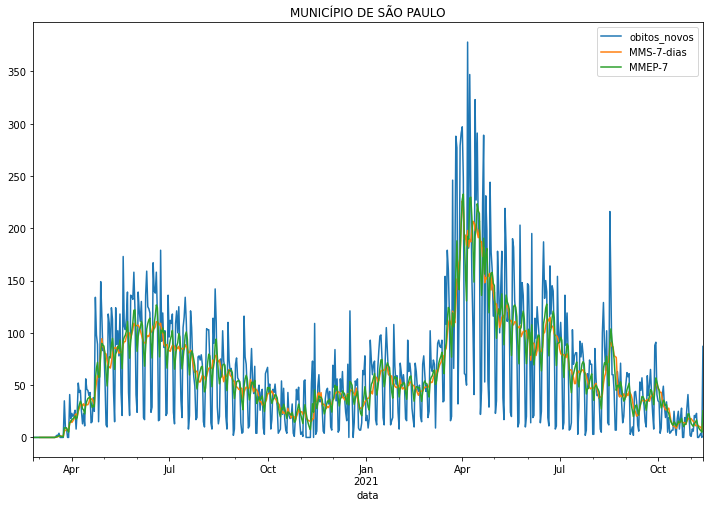

In [15]:
dados_munic_sao_paulo[['obitos_novos','MMS-7-dias','MMEP-7']].plot(figsize=(12,8),title="MUNICÍPIO DE SÃO PAULO").autoscale(axis='x',
                                                        tight=True);

Podemos aplicar igualmente para o número de novos casos, mantendo os demais parâmetros fixos:

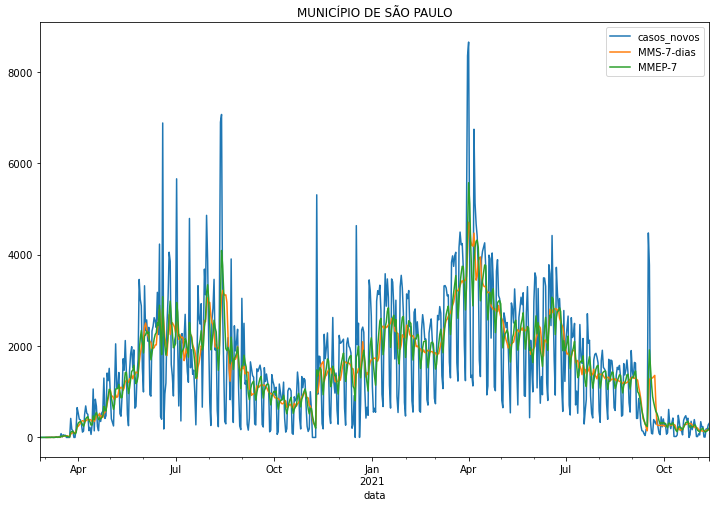

In [16]:
dados_munic_sao_paulo['MMS-7-dias'] = dados_munic_sao_paulo['casos_novos'].rolling(window=7).mean()
dados_munic_sao_paulo['MMEP-7'] = dados_munic_sao_paulo['casos_novos'].ewm(span=7,adjust=False).mean()
dados_munic_sao_paulo[['casos_novos','MMS-7-dias','MMEP-7']].plot(figsize=(12,8),title="MUNICÍPIO DE SÃO PAULO").autoscale(axis='x',
                                                        tight=True);

O gráfico da **MÉDIA MÓVEL** se popularizou por ter sido frequentemente exibido nos telejornais desde o início da pandemia, geralmente para períodos mais curtos, como a semana ou mês atual. Nestes exemplos, onde fixamos cidade e parâmetros, pegando todas as datas no período de estudo (25/02/20 a 06/07/21) vemos com clareza o primeiro pico da doença no inverno de 2020, a baixa devido a medidas de combate (isolamento e vacinação) e o novo pico no outono de 2021 devido ãs novas variantes.

Podemos alterar o tamanho das janelas da média móvel e observar o resultado :


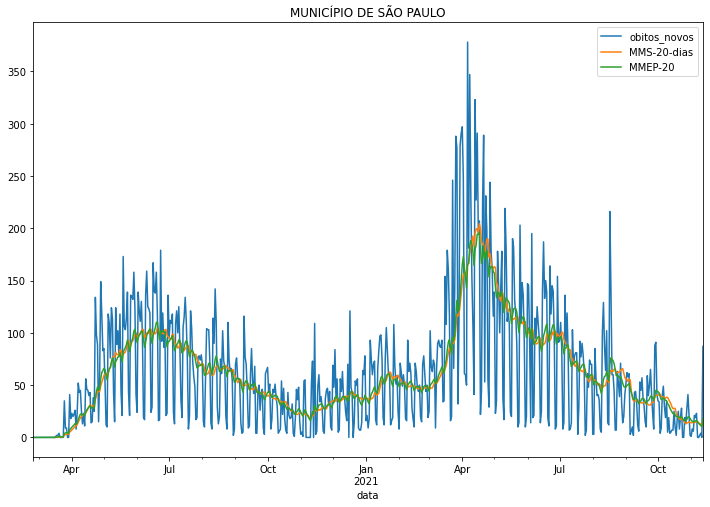

In [17]:
dados_munic_sao_paulo['MMS-20-dias'] = dados_munic_sao_paulo['obitos_novos'].rolling(window=20).mean()
dados_munic_sao_paulo['MMEP-20'] = dados_munic_sao_paulo['obitos_novos'].ewm(span=20,adjust=False).mean()
dados_munic_sao_paulo[['obitos_novos','MMS-20-dias','MMEP-20']].plot(figsize=(12,8),title="MUNICÍPIO DE SÃO PAULO").autoscale(axis='x',
                                                        tight=True);

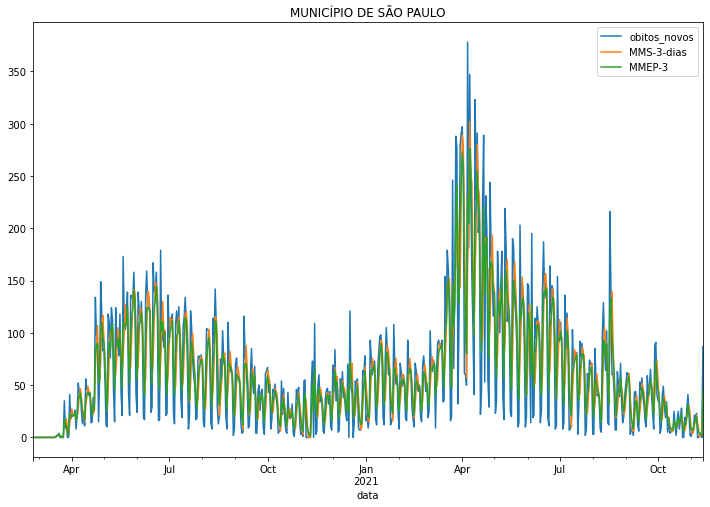

In [18]:
dados_munic_sao_paulo['MMS-3-dias'] = dados_munic_sao_paulo['obitos_novos'].rolling(window=3).mean()
dados_munic_sao_paulo['MMEP-3'] = dados_munic_sao_paulo['obitos_novos'].ewm(span=3,adjust=False).mean()
dados_munic_sao_paulo[['obitos_novos','MMS-3-dias','MMEP-3']].plot(figsize=(12,8),title="MUNICÍPIO DE SÃO PAULO").autoscale(axis='x',
                                                        tight=True);

E com isso confirmrmos que a s curvas das médias móveis MMS e MMEP ficam mais suaves e próximas de um valor central a medida que a janela aumenta; e se diminui, oscilam mais, aproximando-se da curva real. 

Vamos agora observar a curva para outros municípios do estado de São Paulo. Fixaremos o parâmetro da média móvel em 7 dias, para o número de óbitos.

Mais adiante: base do Google no tempo

Fonte dos números sobre população dos municípios : http://www.bibliotecavirtual.sp.gov.br/temas/sao-paulo/sao-paulo-populacao-dos-municipios-paulistas.php, acessado em 21/07/2021

In [26]:
#vamos customizar o filtro de municipio, as médias e o gráfico
def media_movel_municipio(munic,hab):
    
    filtro_munic =(dados_sp['municipio'] == munic)
    dados_munic = dados_sp[filtro_munic][['data','casos_novos','obitos_novos']]
    dados_munic = dados_munic.set_index('data')
    dados_munic['MMS-7-dias'] = dados_munic['obitos_novos'].rolling(window=7).mean()
    dados_munic['MMEP-7'] = dados_munic['obitos_novos'].ewm(span=7,adjust=False).mean()
    dados_munic[['obitos_novos','MMS-7-dias','MMEP-7']].plot(figsize=(12,8),
                                title="MUNICÍPIO DE " + munic + " - " + str(hab) + " habitantes (estimativa dez/2021)" ).autoscale(axis='x',tight=True);
    
    return;
    

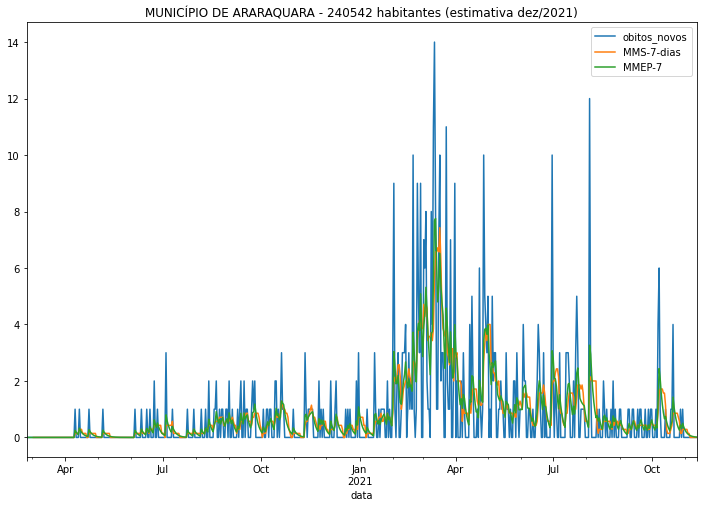

In [27]:
#ARARAQUARA, cidade que aplicou períodos rigorosos de lockdown 
media_movel_municipio("ARARAQUARA",240542)

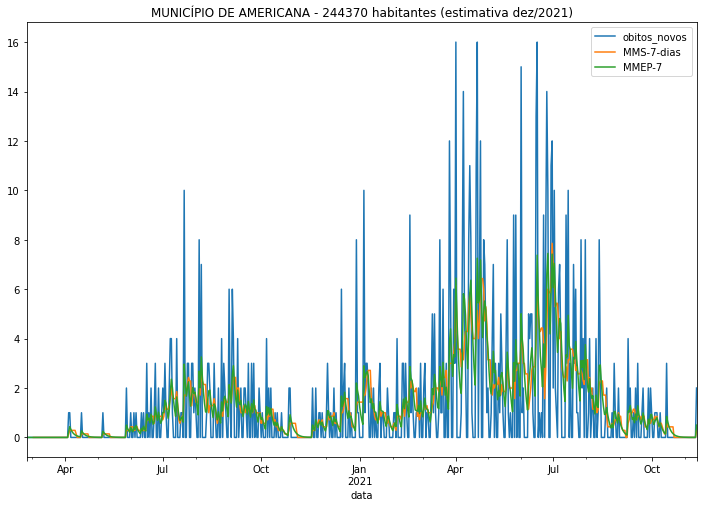

In [28]:
media_movel_municipio("AMERICANA",244370) 

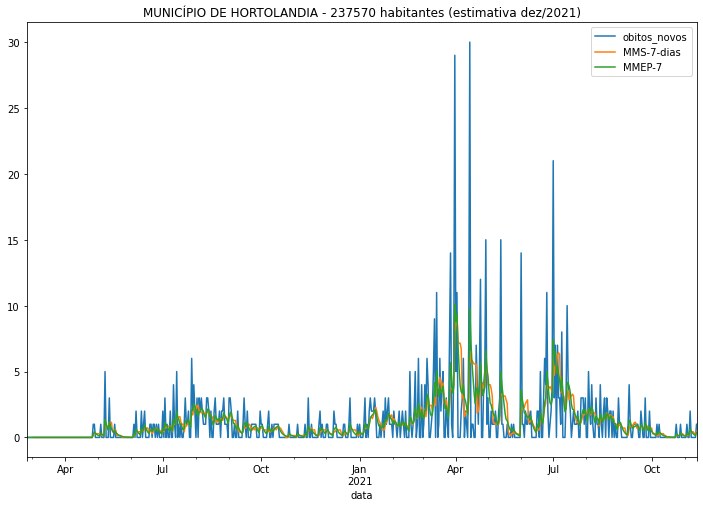

In [29]:
media_movel_municipio("HORTOLANDIA",237570) 

Visualmente, podemos comparar os gráficos acima com as primeiras análises visuais, tomando ARARAQUARA como um caso de cidade com rigoroso lockdown, e cidades na região de Campinas (AMERICANA, HORTOLANDIA) como exemplo oposto, considerando que as três cidades possuem populações bem próximas. 

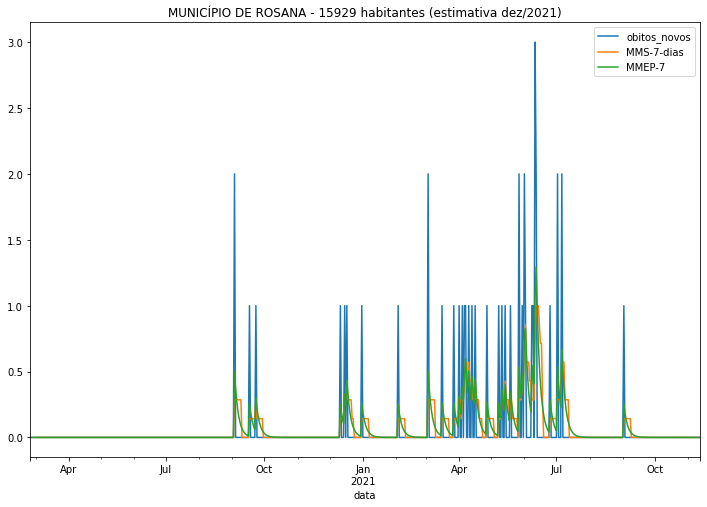

In [30]:
media_movel_municipio("ROSANA", 15929)

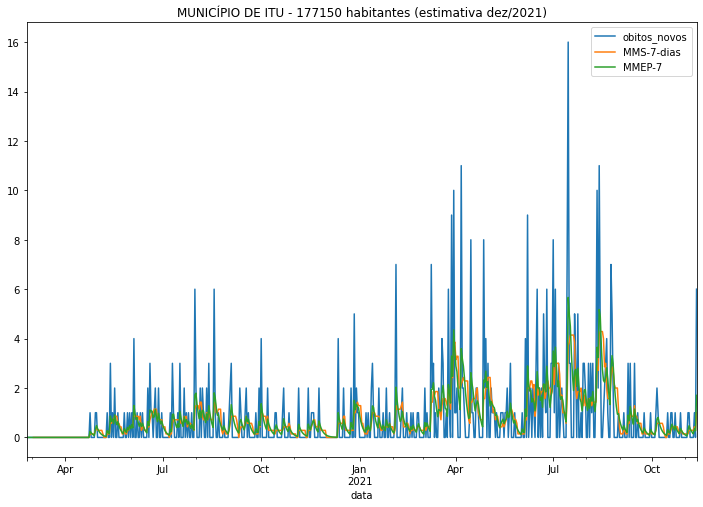

In [31]:
media_movel_municipio("ITU", 177150) 

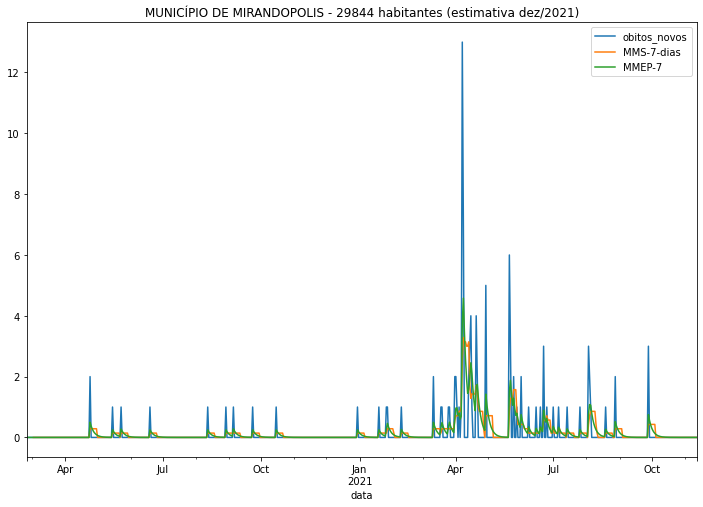

In [32]:
media_movel_municipio("MIRANDOPOLIS",29844) 

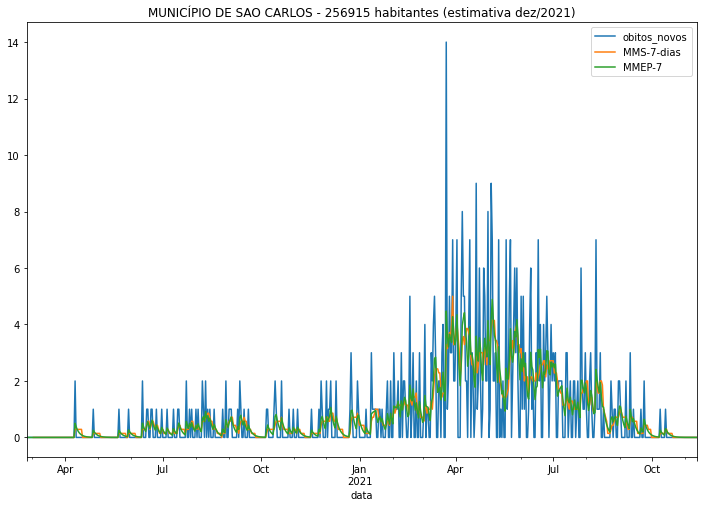

In [33]:
media_movel_municipio("SAO CARLOS",256915) 

Para municípios de pequena e média população, podemos ver os picos ocorrendo mais no primeiro semestre de 2021; municípios de grande população tendem a seguir o perfil da curva da capital.

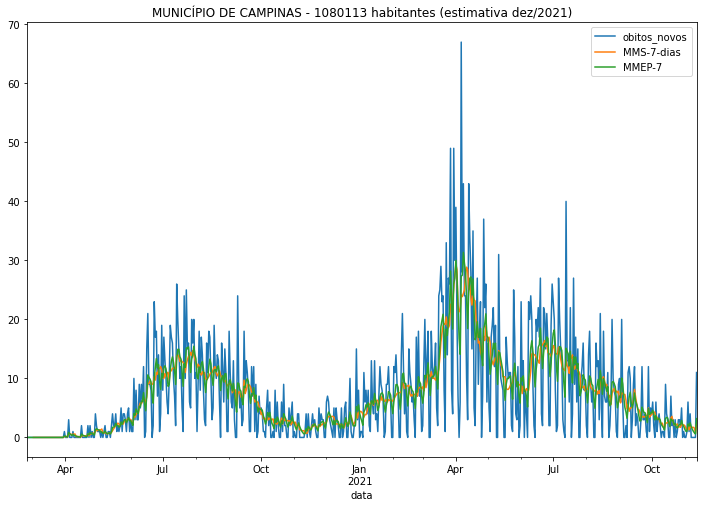

In [34]:
media_movel_municipio("CAMPINAS",1080113) 

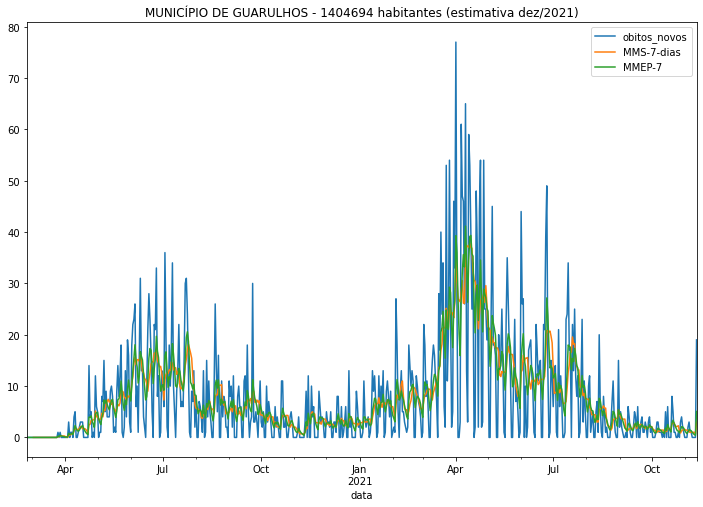

In [36]:
media_movel_municipio("GUARULHOS",1404694) 

### SAZONALIDADE

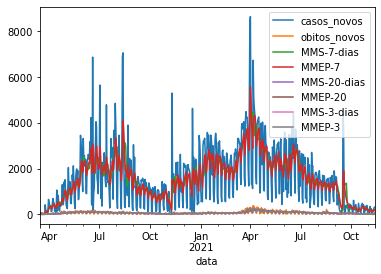

In [37]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

dados_munic_sao_paulo_semnulos = dados_munic_sao_paulo.dropna()
dados_munic_sao_paulo_semnulos.plot()

O gráfico acima acumula tudo o que já foi analisado para o município de São Paulo, em casos e óbitos, mais as médias móveis com 3 janelas diferentes. Vamos isolar somente o gráfico de casos novos.

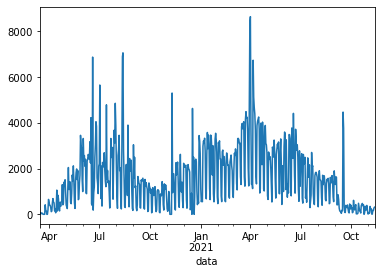

In [38]:
dados_munic_sao_paulo_semnulos['casos_novos'].plot()

In [39]:
dados_munic_sao_paulo_semnulos['casos_novos']

data
2020-03-15      0
2020-03-16     83
2020-03-17     11
2020-03-18     58
2020-03-19     45
             ... 
2021-11-08      7
2021-11-09    185
2021-11-10    165
2021-11-11    274
2021-11-12    312
Name: casos_novos, Length: 608, dtype: int64

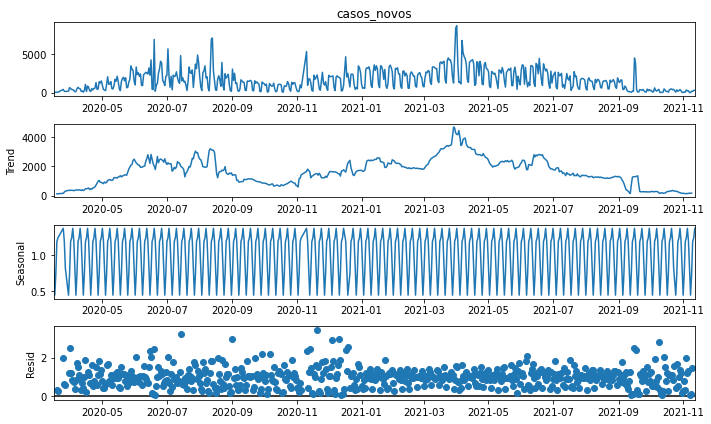

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

result = seasonal_decompose(dados_munic_sao_paulo_semnulos[dados_munic_sao_paulo_semnulos['casos_novos']>0]['casos_novos'], model='multiplicative', period=7)

rcParams['figure.figsize'] = 10, 6

fig = result.plot()

plt.show()



Pela decomposição acima, observamos, na tendência, os grandes picos para novos casos da doença no município de São Paulo. A sazonalidade é aproximadamente semanal, o que mostra não haver outros tipos de ciclos da pandemia no local. A variação residual mostra-se relativamente regular, quase que todo o período dentro de uma faixa, apresenntando poucos outliers. No momento faremos apenas esta decomposição, possivelmente voltando a ela para análises bem distintas, que envolvam outro estado ou país. 

# MÉDIAS MÓVEIS DE INTERNAÇÕES

In [41]:

import pandas as pd
import numpy as np
import datetime as dt
import time

#------------------------------------------------------

# fonte: SEADE
file_name = 'Internacoes.xlsx' 
df = pd.read_excel(file_name, index_col=0)
#df = pd.read_excel('Internacoes.xlsx', engine = 'openpyxl')

# criar uma coluna para marcar se uma linha está ou não nos dados originais
df['Original'] = 1

# criar uma chave (campos municipio + nome do hospital) e uma lista de hospitais
df['key'] = df['Municipio'] + ' - ' + df['Nome Fantasia']
hospital_list = df['key'].unique().tolist()

# definir o período cheio (de 03/12/2020 até 23/07/2021)
d_first = dt.date(2020, 12, 3)
d_today = dt.date.today()
#d_today = d_today - dt.timedelta(days=1) #ontem
idxs_period = pd.date_range(d_first, d_today, freq = "D")
#idxs_period = idxs_period.astype('datetime64[ns]')

# seleciona todas as linhas de cada hospital
hosp_ind = ['Pacientes Enfermaria','Pacientes UTI']
df_final = []
for i in hospital_list:

    # Caso 0: 'Pacientes Enfermaria'
    #----------------------------------
    df_hosp_Enf = df.loc[(df['key'] == i) & (df['Nomes de medida'] == hosp_ind[0])]    

    # Ajusta o campo Data como índice, e reindea para adicionar as linhas faltantes de 
    #'idxs_period'
    df_hosp_Enf.set_index('Data', inplace=True)
    df_hosp_Enf.index = pd.DatetimeIndex(df_hosp_Enf.index)
    df_hosp_Enf = df_hosp_Enf.reindex(idxs_period) #expand the rows to get 'idxs_periods'
 
    # Preenche nulos do campo Original com 0.0 (ajusta a linha como uma criada artificialmente)
    df_hosp_Enf['Original'] = df_hosp_Enf['Original'].fillna(0)

    # preenche os valores nulos das linhas, incluindo as linhas anteriores
    df_hosp_Enf = df_hosp_Enf.ffill().bfill()

    # Heuristica 1: marca Original = 0 para as linhas artificiais cujos Valores de medida = 1, porque
    # a linha atual é uma linha fantasma gerada de uma linha original com valor = 1
    mask = (df_hosp_Enf['Original'] == 0) & (df_hosp_Enf['Valores de medida'] == 1)
    df_hosp_Enf.loc[mask, 'Valores de medida'] = 0

    # Heuristica 2: marcar com 0 todas as linhas fantasma criadas antes da primeira linha original.
    # Isso é feito para eliminar as linhas criadas incorretamente que vieram dos dados de hospitais
    # de campanha.
    array_indices = np.where(df_hosp_Enf['Original'] == 1)
    first_occur = array_indices[0][0]  #indice da primeira linha original disponivel
    if (first_occur != 0):
        #lista de datas indices
        idxs_first_period = pd.date_range(d_first, periods = first_occur, freq = "D") 
        #print(first_occur)
        #print(idxs_first_period)
        df_hosp_Enf.loc[idxs_first_period, 'Valores de medida'] = 0
        
    #print(df_hosp_Enf[['Nome Fantasia','Valores de medida', 'Original']].head)
    #time.sleep(2)

    # calcula a média móvel (win=7)
    df_hosp_Enf['mv'] = df_hosp_Enf['Valores de medida'].rolling(7, min_periods = 1).mean()
    #----------------------------------

    # Caso 1: 'Pacientes UTI'
    #----------------------------------
    df_hosp_UTI = df.loc[(df['key'] == i) & (df['Nomes de medida'] == hosp_ind[1])]    

    # Coloca o campo Data como indice, e reindexa para acrescentar as linhas faltantes de 'idxs_period'
    df_hosp_UTI.set_index('Data', inplace=True)
    df_hosp_UTI.index = pd.DatetimeIndex(df_hosp_UTI.index)
    df_hosp_UTI = df_hosp_UTI.reindex(idxs_period) #expand the rows to get 'idxs_periods'

    # preenche os nulos do campo 'Original' com 0.0 (marca a linha como criada artificialmente)
    df_hosp_UTI['Original'] = df_hosp_UTI['Original'].fillna(0)

    # preenche os valores nulos das linhas, incluindo as linhas anteriores
    df_hosp_UTI = df_hosp_UTI.ffill().bfill()

    # Heuristica 1: marca zero nas linhas artificiais (Original=0) cujos "Valores de medida = 1"
    # (pois a linha atual é uma fantasma  gerada de uma original com valor = 1) 
    mask = (df_hosp_UTI['Original'] == 0) & (df_hosp_UTI['Valores de medida'] == 1)
    df_hosp_UTI.loc[mask, 'Valores de medida'] = 0

    # Heuristic 2: marca zero nas linhas fantasma criadas antes da primeira linha origina. 
    # isso é feito para eliminar as linhas criadas incorretamente porque são referentes a hospitais
    # de campanha 
    array_indices = np.where(df_hosp_UTI['Original'] == 1)
    first_occur = array_indices[0][0]  #indice da primeira linha original disponivel
    if (first_occur != 0):
        idxs_first_period = pd.date_range(d_first, periods = first_occur, freq = "D") #indices de datas
        #print(first_occur)
        #print(idxs_first_period)
        df_hosp_UTI.loc[idxs_first_period, 'Valores de medida'] = 0

    # calcula a média móvel (win=7)
    df_hosp_UTI['mv'] = df_hosp_UTI['Valores de medida'].rolling(7, min_periods = 1).mean()
    #----------------------------------

    # unifica os dois dataframes
    df_final.append(df_hosp_Enf)
    df_final.append(df_hosp_UTI)
    #print(df_hosp_Enf[['Nomes de medida','Valores de medida']])

# concatena os sub-dataframes ('Enfermaria' e 'UTI')
df_final = pd.concat(df_final)

# exclui todas as linhas sem Nome Fantasis
df_final = df_final[~df_final['Nome Fantasia'].isnull()]

# ajuste final (remove campo chave e converte campo data)
#df_final.set_index('Data', drop=True, inplace=True)
df_final = df_final.drop('key', 1)
df_final.reset_index(inplace=True)
df_final.rename({'index': 'Data'}, axis = 1, inplace = True)

#df.index = [i for i in range(df_final.shape)]

print(df_final.head())

df_final.to_excel("output.xlsx")


        Data   DRS Nome     Municipio  \
0 2020-12-03  Araçatuba  MIRANDÓPOLIS   
1 2020-12-04  Araçatuba  MIRANDÓPOLIS   
2 2020-12-05  Araçatuba  MIRANDÓPOLIS   
3 2020-12-06  Araçatuba  MIRANDÓPOLIS   
4 2020-12-07  Araçatuba  MIRANDÓPOLIS   

                                       Nome Fantasia       Nomes de medida  \
0  UNID INT SAUDE DR OSWALDO B FARIA DE MIRANDOPOLIS  Pacientes Enfermaria   
1  UNID INT SAUDE DR OSWALDO B FARIA DE MIRANDOPOLIS  Pacientes Enfermaria   
2  UNID INT SAUDE DR OSWALDO B FARIA DE MIRANDOPOLIS  Pacientes Enfermaria   
3  UNID INT SAUDE DR OSWALDO B FARIA DE MIRANDOPOLIS  Pacientes Enfermaria   
4  UNID INT SAUDE DR OSWALDO B FARIA DE MIRANDOPOLIS  Pacientes Enfermaria   

   Valores de medida  Original        mv  
0                1.0       1.0  1.000000  
1                2.0       1.0  1.500000  
2                1.0       1.0  1.333333  
3                1.0       1.0  1.250000  
4                0.0       1.0  1.000000  


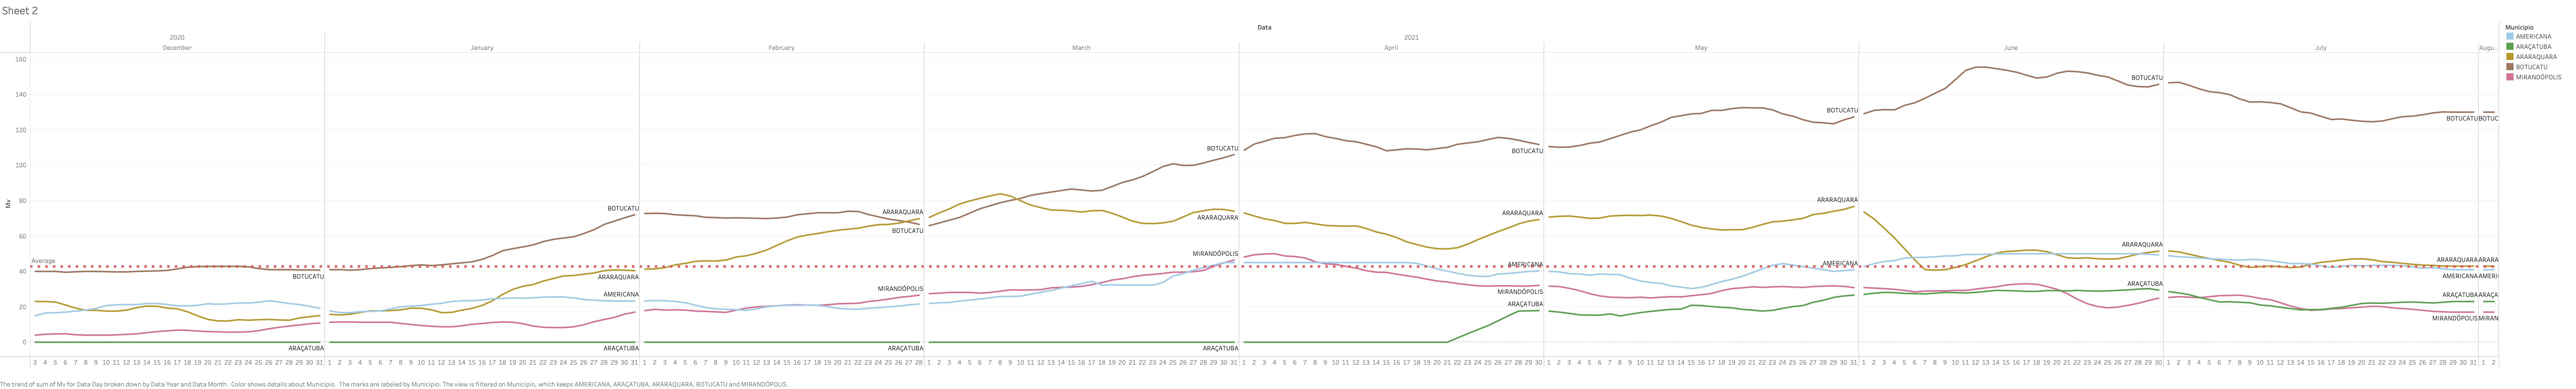

Desta vez, optamos por gerar o gráfico mostrando as médias móveis na ferramenta TABLEAU, a partir do arquivo Excel de saída gerado ao final, conforme mostrado logo abaixo, para alguns municípios selecionados, e pegando os meses de fevereiro a abril de 2021, e incluindo o painel de controle do Tableau. Para que os gráficos fiquem mais limpos, colocamos somente as médias móveis sem a curva dos dados originais.  
Voltaremos ao gráfico comparativo mais adiante, utilizando uma métrica mais apropriada para comparações - casos/óbitos por 100mil ou por 1 milhão de habitantes. 

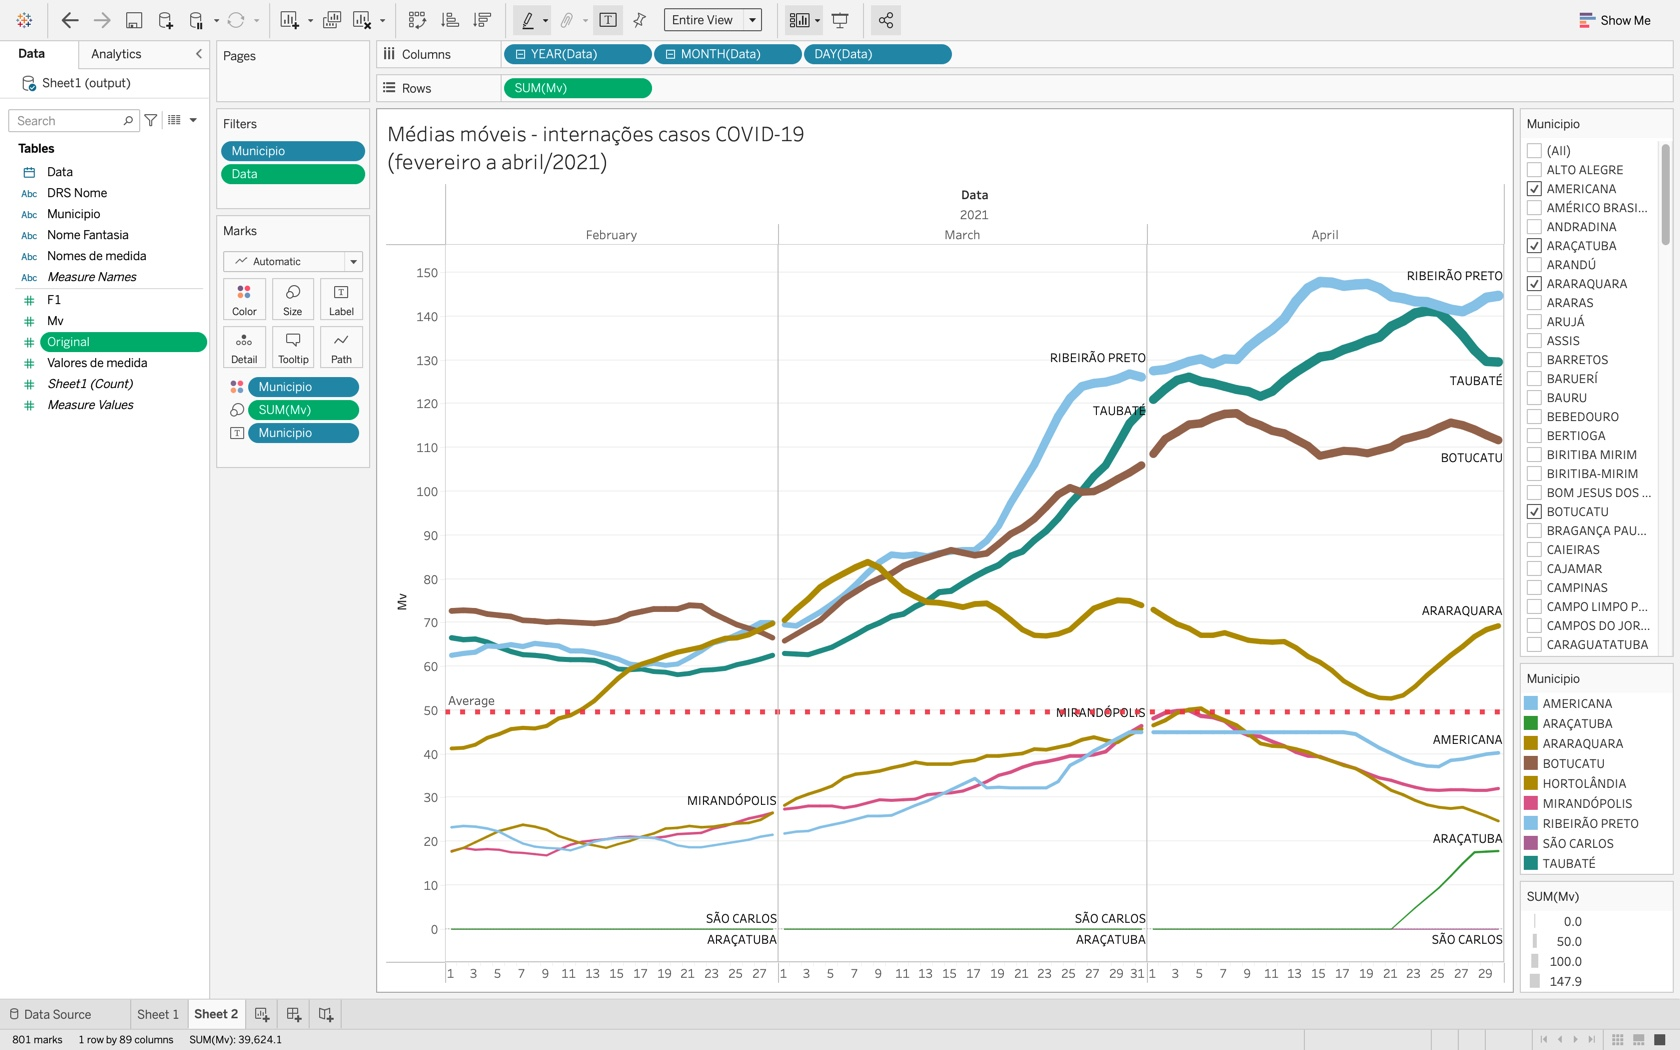

# Previsão de séries temporais com sktime
### Equipe de Apoio: Moisés Santos.  
  
    
   

Este notebook foi publicado na sexta semana da disciplina APRENDIZAGEM DE MÁQUINA, sendo publicado pelo Moisés Santos, monitor da disciplina, embora o assunto SÉRIES TEMPORAIS esteja sendo tratado em outra disciplina, APRENDIZADO DINÂMICO.  
  
Aqui, iremos acompanhar as análises daquele notebook original, substituindo a base de consumo de energia pela base acima de casos da COVID-19 no Estado de São Paulo. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import AutoARIMA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.model_selection import SlidingWindowSplitter, temporal_train_test_split
from sktime.transformations.series.impute import Imputer
import numpy as np
import matplotlib.dates as mdates

rcParams['figure.figsize'] = 18, 8

In [43]:
dados_sp

municipio       data  casos_novos  obitos_novos
0       AGUAS DA PRATA 2020-02-25            0             0
1       AGUAS DA PRATA 2020-02-26            0             0
2       AGUAS DA PRATA 2020-02-27            0             0
3       AGUAS DA PRATA 2020-02-28            0             0
4       AGUAS DA PRATA 2020-02-29            0             0
...                ...        ...          ...           ...
404410        ZACARIAS 2021-11-08            0             0
404411        ZACARIAS 2021-11-09            0             0
404412        ZACARIAS 2021-11-10            0             0
404413        ZACARIAS 2021-11-11            0             0
404414        ZACARIAS 2021-11-12            0             0

[404415 rows x 4 columns]

In [46]:
#vamos trabalhar sempre com um municipio de cada vez
def df_munic(munic):
    filtro_munic =(dados_sp['municipio'] == munic)
    dados_munic = dados_sp[filtro_munic][['data','obitos_novos']]
    dados_munic = dados_munic.set_index('data')
    return(dados_munic)

In [47]:
df = df_munic("SAO PAULO")

In [48]:
df

obitos_novos
data                    
2020-02-25             0
2020-02-26             0
2020-02-27             0
2020-02-28             0
2020-02-29             0
...                  ...
2021-11-08             0
2021-11-09             2
2021-11-10             4
2021-11-11             0
2021-11-12            87

[627 rows x 1 columns]

In [58]:
data_ANALISE = pd.Series(df["obitos_novos"].values, index=pd.date_range(start = '02/25/2020', end = '11/12/2021', freq='D'))

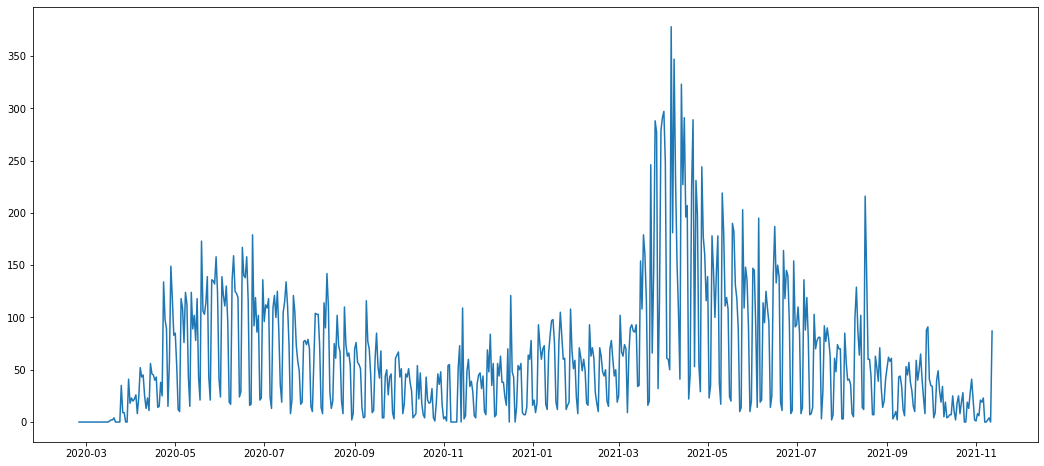

In [64]:
fig = plt.plot(data_ANALISE)
#fig.autofmt_xdate()
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

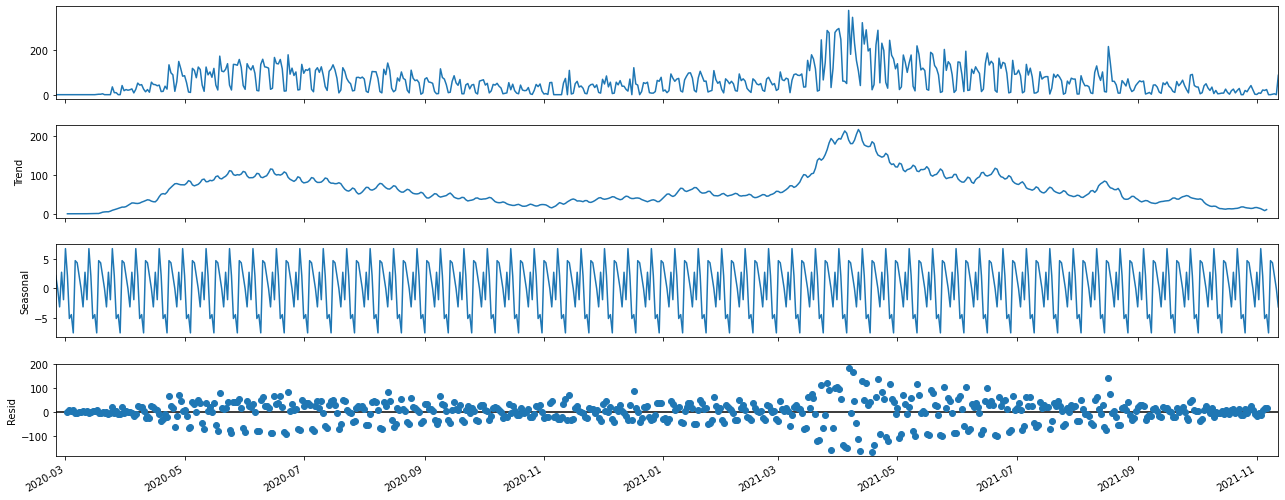

In [65]:
#decompondo a série temporal em seus componentes - curva, tendencia, sazonalidade, ruido
fig = seasonal_decompose(data_ANALISE,model="additive",period=12).plot()
fig.autofmt_xdate()
plt.show()

In [66]:
#vamos dividir a base de dados em treino e teste, e plotar para ver como ficou
y_train, y_test = temporal_train_test_split(pd.Series(data_ANALISE.values), test_size=0.25)

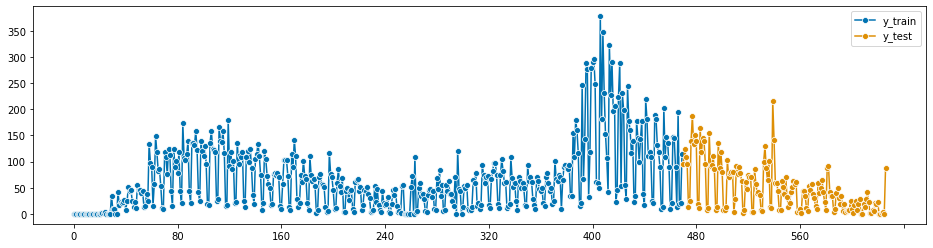

470 157


In [68]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()
print(y_train.shape[0], y_test.shape[0])

# Modelo de previsão naive

Este modelo assume que a estrutura sazonal dos dados irá se repetir, o que é confrontado abaixo com os dados de teste e vemos que falha em prever o grande pico de mar/21 para a cidade de São Paulo. 

In [71]:
fh_1 = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh_1)
naive = y_pred

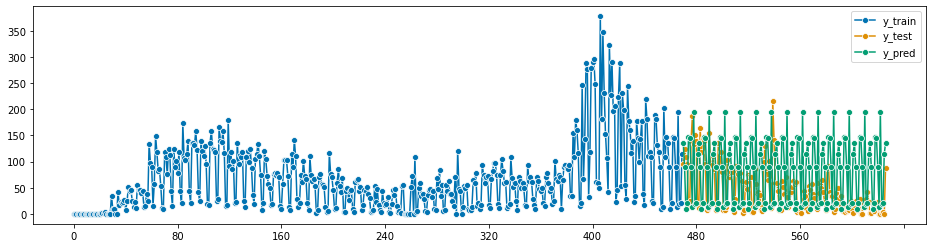

In [72]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [41]:
#abaixo podemos ver como ficou alto o erro
mean_absolute_percentage_error(y_test, y_pred)*100

94.73307145258936

Theils U (TU): Esta métrica mede o quão bom é o seu modelo de previsão em relação ao modelo naive.
  .
Prediction Of Change In Direction (POCID): Esta métrica mede o quanto o seu modelo consegue prever a direção da tendência de seus dados.

In [62]:
def TU(y_test, y_pred, naive):
    return sum(np.power((y_test - y_pred), 2))/sum(np.power((y_test - naive), 2))
    
def POCID(y_test, y_pred):
    diff_original= (y_test-y_test.shift(1)).dropna().values
    diff_pred= (y_pred-y_pred.shift(1)).dropna().values
    is_positive = (diff_original * diff_pred)>0
    return (is_positive.sum()/len(is_positive)) * 100


In [43]:
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

1.0
50.806451612903224


# ARIMA no sktime

O clássico modelo ARIMA também faz parte do pacote sktime. Suas previsões, como podemos ver a seguir, seguem classicamente distantes da realidade observada. 

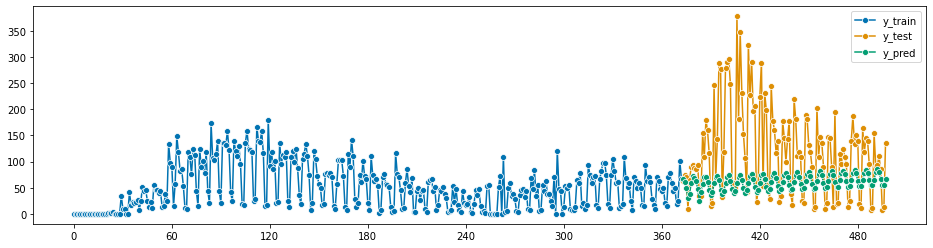

73.26791650692235
0.7881752049490233
68.54838709677419


In [44]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [45]:
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  373
Model:             SARIMAX(2, 1, 3)x(1, 0, [], 12)   Log Likelihood               -1736.859
Date:                             Mon, 30 Aug 2021   AIC                           3489.719
Time:                                     05:17:58   BIC                           3521.070
Sample:                                          0   HQIC                          3502.169
                                             - 373                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1315      0.186      0.707      0.479      -0.233       0.496
ar.L1          1.2509      0.006    204.735      0.000       1.239       1.263
ar.L2         -0.9973      0.005   -205.637      0.000      -1.007      -0.988
ma.L1         -2.1086      0.035    -60.395      0.000      -2.177      -2.040
ma.L2          1.9935      0.052     38.576      0.000       1.892       2.095
ma.L3         -0.7672      0.034    -22.320      0.000      -0.835      -0.700
ar.S.L12      -0.2621      0.052     -4.996      0.000      -0.365      -0.159
sigma2       664.6338     42.627     15.592      0.000     581.086     748.182
===================================================================================
Ljung-Box (L1) (Q):                   2.82   Jarque-Bera (JB):                56.43
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.67
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# KNN

Calculemos as previsões a partir da regressão do modelo KNN.Podemos ver que se aproxima do modelo Naive, com relação aos valores mínimos.

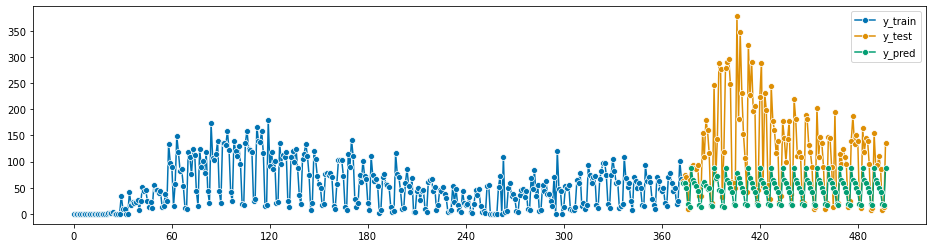

74.31159631451779
0.8185283940963454
69.35483870967742


In [46]:
regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [47]:
#parametros do KNN
forecaster.get_params()

{'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 3,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(n_neighbors=3),
 'window_length': 12}

In [68]:
#o pipeline simplificado abaixo faz as devidas "limpezas e arrumações" na base antes de gerar 
#novamente as previsões
def get_transformed_target_forecaster(regressor):    
    forecaster = TransformedTargetForecaster( steps=
        [
            ("imputer", Imputer(method="linear")),
            ("deseasonalise", Deseasonalizer(model="additive", sp=12)),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
            ("forecast", make_reduction(regressor, window_length=12, strategy="recursive")),
        ]
    )
    return forecaster

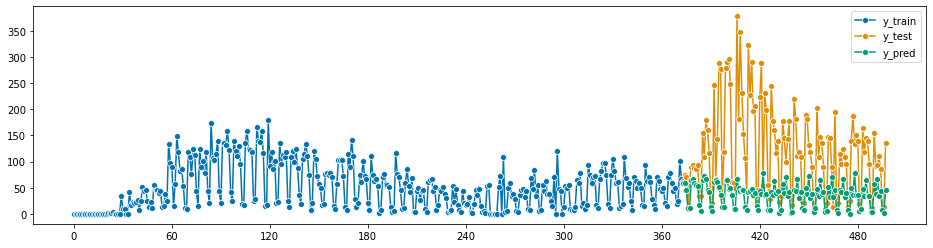

100.2032117209088
0.9993745130112903
64.51612903225806


In [49]:
forecaster = get_transformed_target_forecaster(KNeighborsRegressor())
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [50]:
#acima, os erros aumentaram bastante

# REGRESSÃO LINEAR

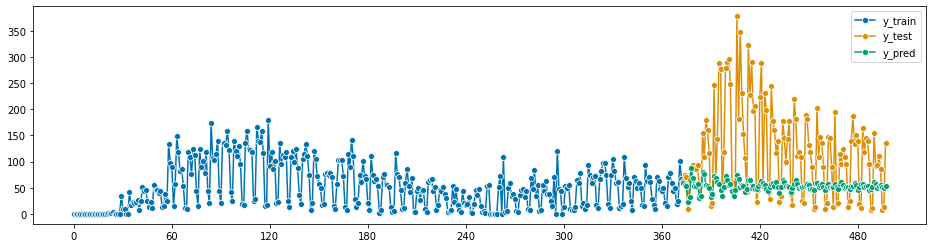

82.25720736418626
0.8800341762093024
62.903225806451616


In [51]:
forecaster = get_transformed_target_forecaster(LinearRegression())
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [52]:
#novamente vemos as previsões bem distantes da ccurva teste

# RANDOM FOREST

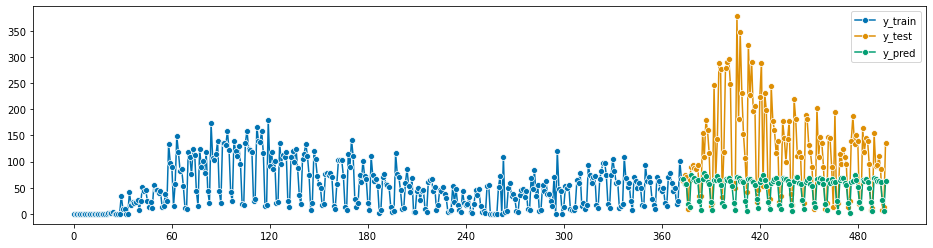

77.69833824824704
0.8075504300399025
65.32258064516128


In [53]:
forecaster = get_transformed_target_forecaster(RandomForestRegressor(random_state=14))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [54]:
np.isnan(df.values).sum()

0

A conclusão é que nenhum dos modelos de machine learning consegue prever os picos que aconteceram na cidade de São Paulo em 2021. Vamos apenas colocar abaixo outro município, referência em implantação de lockdowns - ARARAQUARA. E reproduzir todos os gráficos acima. 

In [55]:
df = df_munic("ARARAQUARA")

In [56]:
data_ANALISE = pd.Series(df["obitos_novos"].values, index=pd.date_range(start = '02/25/2020', end = '07/06/2021', freq='D'))

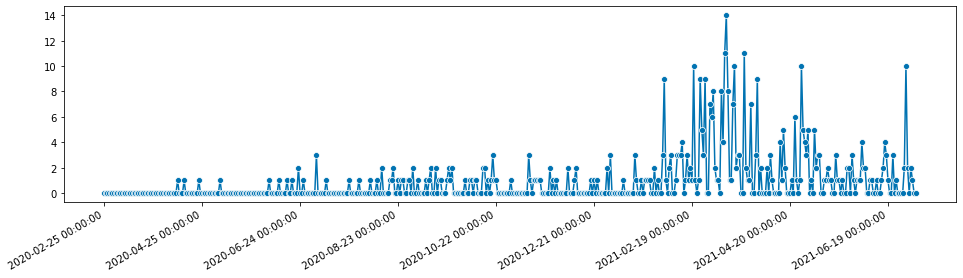

In [57]:
fig, ax = plot_series(data_ANALISE)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

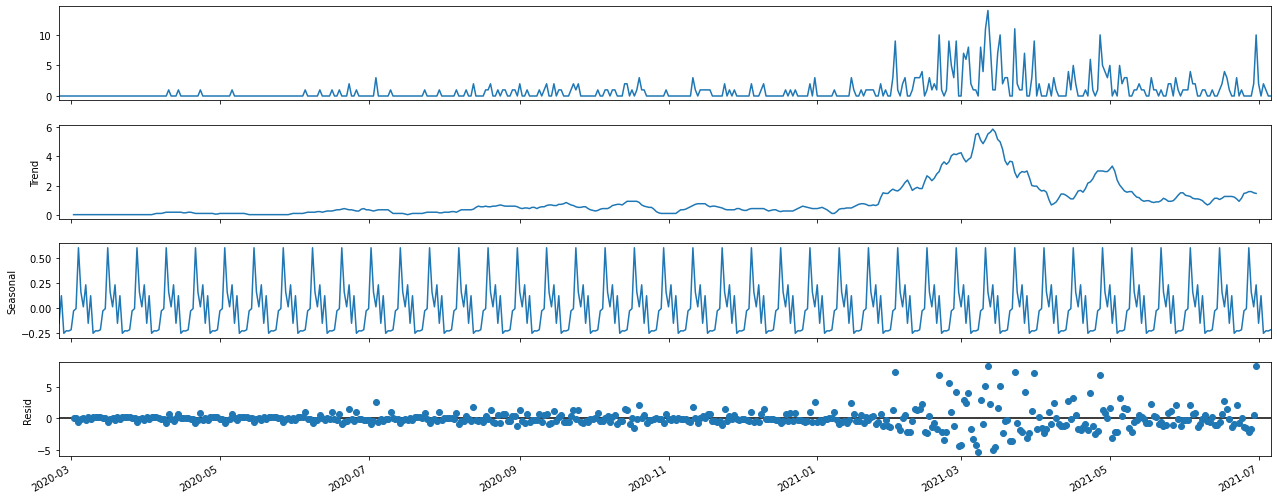

In [58]:
#decompondo a série temporal em seus componentes - curva, tendencia, sazonalidade, ruido
fig = seasonal_decompose(data_ANALISE,model="additive",period=12).plot()
fig.autofmt_xdate()
plt.show()

In [59]:
#muito interessante observar o que aconteceu em março/21 !!! podemos esperar falhas das previsões 
#nesse periodo!!

In [60]:
#vamos dividir a base de dados em treino e teste, e plotar para ver como ficou
y_train, y_test = temporal_train_test_split(pd.Series(data_ANALISE.values), test_size=0.25)

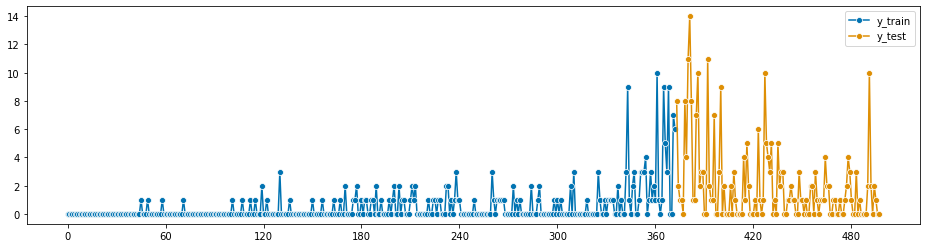

373 125


In [61]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()
print(y_train.shape[0], y_test.shape[0])

In [62]:
#a divisao treino/teste ocorre bem no meio do periodo atipico, isso deve pesar nas previsoes

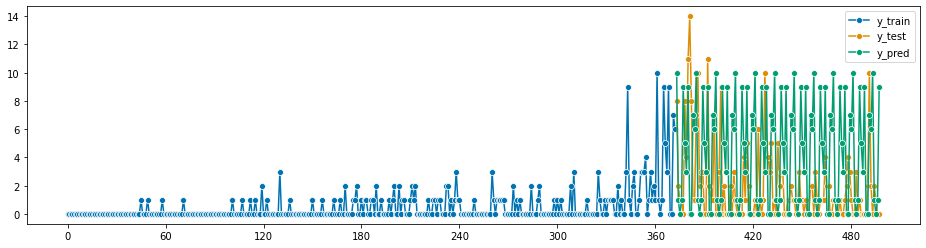

In [63]:
#PREVISAO NAIVE
fh_1 = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh_1)
naive = y_pred

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [64]:
#interessante!!! a previsao "travou"nos picos de março e assim permaneceu. Vejamso os demais modelos

In [65]:
mean_absolute_percentage_error(y_test, y_pred)*100 #erro ficou mais alto!!!

140.89895829660534

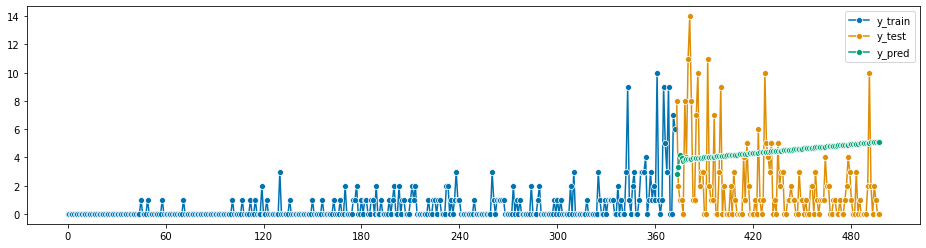

125.98107230465787
0.5536894246370921
32.25806451612903


In [66]:
#PREVISAO ARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [67]:
#erro alto, e a curva bem fora...

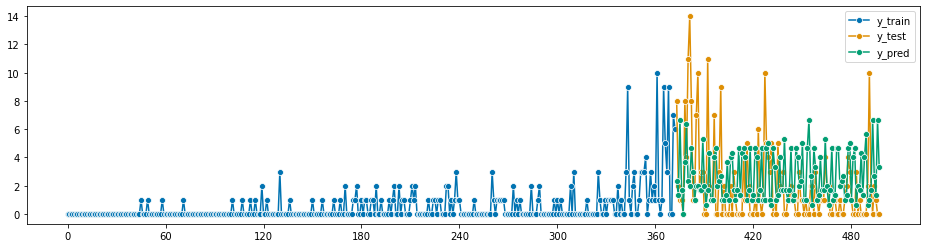

111.60581181877389
0.461556283718929
27.419354838709676


In [68]:
#PREVISAO REGRESSOR KNN
regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [69]:
#erro diminuiu e a curva esta melhor posicionada

In [70]:
#o pipeline simplificado abaixo faz as devidas "limpezas e arrumações" na base antes de gerar 
#novamente as previsões
def get_transformed_target_forecaster(regressor):    
    forecaster = TransformedTargetForecaster( steps=
        [
            ("imputer", Imputer(method="linear")),
            ("deseasonalise", Deseasonalizer(model="additive", sp=12)),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
            ("forecast", make_reduction(regressor, window_length=12, strategy="recursive")),
        ]
    )
    return forecaster

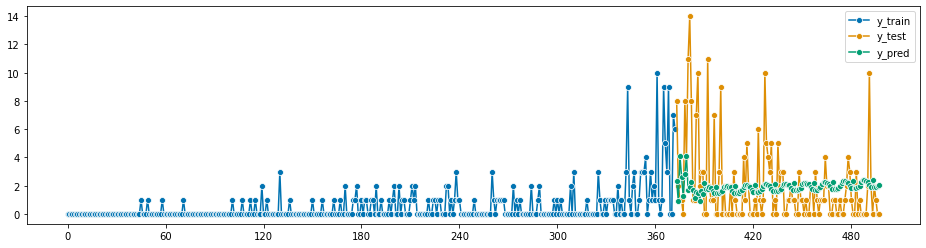

114.5788735329267
0.30551280395546293
37.096774193548384


In [71]:
#PREVISAO REGRESSAO KNN COM PIPELINE DE LIMPEZA
forecaster = get_transformed_target_forecaster(KNeighborsRegressor())
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

In [72]:
#PIOROU BASTANTE

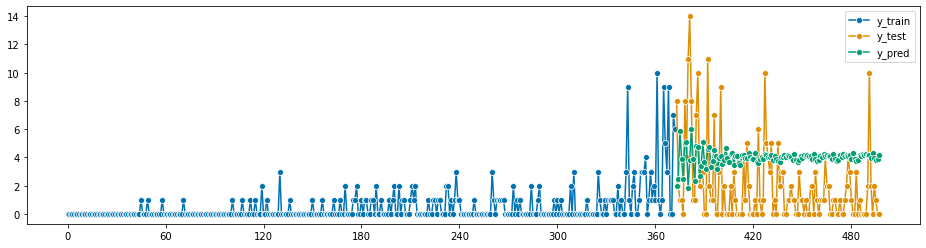

121.5143622932897
0.44401255911965526
40.32258064516129


In [73]:
#PREVISAO REGRESSAO LINEAR
forecaster = get_transformed_target_forecaster(LinearRegression())
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

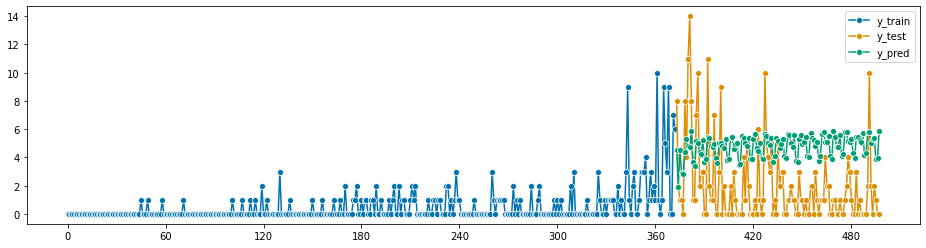

127.14102017386098
0.5577488222247252
45.96774193548387


In [74]:
#PREVISAO RANDOM FOREST
forecaster = get_transformed_target_forecaster(RandomForestRegressor(random_state=14))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

Resumindo, para a cidade de ARARAQUARA, saiu-se melhor o modelo REGRESSOR KNN, que capturou a tendencia das anomalias de março mas manteve depois a curva num nivel medio, seguindo os valores medios, sem manter a anomalia e com isso tendo o menor erro percentual absoluto. 

agora, vamos colocar a seguir os testes com series temporais utilizando REDES NEURAIS RECORRENTES.

# Modelagem de séries temporais usando o keras

Retomemos os dados para a cidade de SÃO PAULO.

In [86]:
df = df_munic("SAO PAULO")

In [87]:
df

obitos_novos
datahora              
25/02/20             0
26/02/20             0
27/02/20             0
28/02/20             0
29/02/20             0
...                ...
02/07/21           110
03/07/21            85
04/07/21             8
05/07/21            14
06/07/21           136

[498 rows x 1 columns]

In [88]:
data_ANALISE = pd.Series(df["obitos_novos"].values, index=pd.date_range(start = '02/25/2020', end = '07/06/2021', freq='D'))

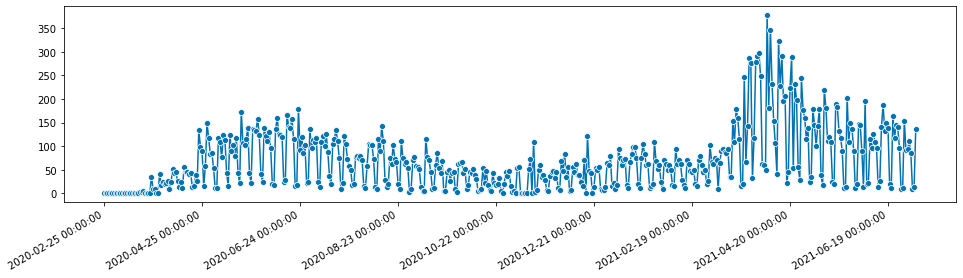

In [89]:
fig, ax = plot_series(data_ANALISE)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

Vamos separar a base em TREINAMENTO e TESTE.

In [91]:
tr  = len(df)

In [92]:
tr*0.9


448.2

In [93]:
train = df.iloc[:448]
test = df.iloc[448:]

A coluna de valores deve ser padronizada

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)



Vamos agora gerar a série temporal no Tensorflow.

In [73]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [96]:
# defina o gerador
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

Vamos criar o modelo no Tensorflow

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [99]:
model.fit_generator(generator,epochs=250)

Epoch 1/250
446/446 [==============================] - 2s 2ms/step - loss: 0.0248
Epoch 2/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0212
Epoch 3/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0210
Epoch 4/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0205
Epoch 5/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0201
Epoch 6/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0199A: 0s - loss:
Epoch 7/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0197
Epoch 8/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0196
Epoch 9/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0197
Epoch 10/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0194
Epoch 11/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0193
Epoch 12/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0191


446/446 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 195/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0159A: 0s - loss
Epoch 196/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 197/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 198/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0158
Epoch 199/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 200/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 201/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 202/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0159
Epoch 203/250
446/446 [==============================] - 1s 2ms/step - loss: 0.0158
Epoch 204/250
446/446 [==============================] - 1s 1ms/step - loss: 0.0161
Epoch 205/250
446/446 [==============================] - 1s 2ms/step - loss: 0

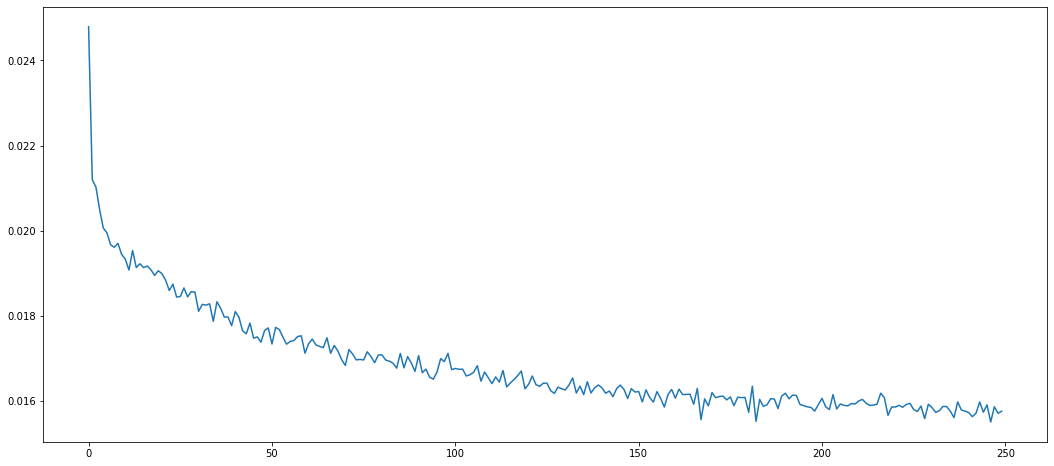

In [100]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [108]:
# Vejamos passo a passo como é feita a previsão, a princípio para a próxima observação 
#usando o tamanho do lote igual a 2
first_eval_batch = scaled_train[-2:]

In [109]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [110]:
model.predict(first_eval_batch)

array([[0.17930607]], dtype=float32)

In [111]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [112]:
current_batch.shape

(1, 2, 1)

In [113]:
current_batch

array([[[0.06349206],
        [0.05291005]]])

In [114]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[5.29100529e-02],
        [9.90000000e+01]]])

In [115]:
# Agora vamos considerar as previsões para as próximas 21 observações e comparar com a base de teste

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]
    
    # predição
    test_predictions.append(current_pred) 
    
    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [116]:
scaled_test

array([[0.5026455 ],
       [0.48148148],
       [0.34656085],
       [0.31216931],
       [0.23544974],
       [0.02645503],
       [0.03703704],
       [0.53703704],
       [0.28835979],
       [0.39153439],
       [0.35978836],
       [0.23809524],
       [0.02645503],
       [0.05291005],
       [0.38888889],
       [0.38359788],
       [0.23809524],
       [0.03703704],
       [0.51587302],
       [0.05026455],
       [0.05555556],
       [0.3015873 ],
       [0.25132275],
       [0.33068783],
       [0.28835979],
       [0.25132275],
       [0.03703704],
       [0.06613757],
       [0.37037037],
       [0.49470899],
       [0.35185185],
       [0.3968254 ],
       [0.36772487],
       [0.05026455],
       [0.02910053],
       [0.43386243],
       [0.31216931],
       [0.38359788],
       [0.37037037],
       [0.25396825],
       [0.02116402],
       [0.02910053],
       [0.40740741],
       [0.24074074],
       [0.24603175],
       [0.29100529],
       [0.22486772],
       [0.021

In [117]:
#retorno da padronização e compara;áo
true_predictions = scaler.inverse_transform(test_predictions)

In [118]:
test['Predictions'] = true_predictions

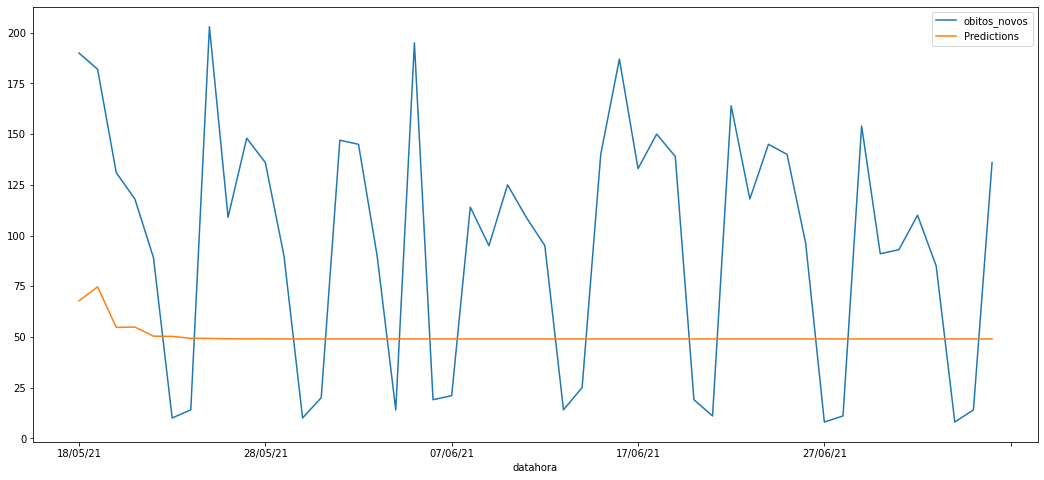

In [119]:
test.plot()

Gráficos a parte, não conseguimos uma previsão melhor...

# **PREVISÕES PARA CURVAS ACUMULADAS**

#### Até agora vinhamos apresentando os modelos e suas previsões para as séries de valores diários - casos, óbitos. Vamos aplicá-los para uma base de dados acumulados.  
Aproveitemos para ler dados atualizados da base do SEADE, que inclusive já irá conter os valores acumulados.
  
Dados lidos de https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv em 27/09/2021. As colunas que não serão utilizadas foram removidas no próprio Excel.  
  
De resto, seguiremos os mesmos passos e modelos anteriores, incluindo comentários onde pertinente.

In [38]:
df = pd.read_excel("dados_completos_sp_20210927.xlsx")

In [39]:
df

datahora         municipio  casos  casos_pc  obitos  obitos_pc  \
0      2020-02-25        ADAMANTINA      0       0.0       0        0.0   
1      2020-02-25            ADOLFO      0       0.0       0        0.0   
2      2020-02-25             AGUAI      0       0.0       0        0.0   
3      2020-02-25    AGUAS DA PRATA      0       0.0       0        0.0   
4      2020-02-25  AGUAS DE LINDÓIA      0       0.0       0        0.0   
...           ...               ...    ...       ...     ...        ...   
374675 2021-09-22          IGNORADO   1489       0.0      10        0.0   
374676 2021-09-23          IGNORADO   1043       0.0       9        0.0   
374677 2021-09-24          IGNORADO    657       0.0       4        0.0   
374678 2021-09-25          IGNORADO    255       0.0       6        0.0   
374679 2021-09-26          IGNORADO    128       0.0       0        0.0   

        latitude  longitude  
0       -21.6820   -51.0737  
1       -21.2325   -49.6451  
2       -22.0572   -46.9735  
3       -21.9319   -46.7176  
4       -22.4733   -46.6314  
...          ...        ...  
374675    0.0000     0.0000  
374676    0.0000     0.0000  
374677    0.0000     0.0000  
374678    0.0000     0.0000  
374679    0.0000     0.0000  

[374680 rows x 8 columns]

In [40]:
df = df[df['municipio'] != "IGNORADO"] #exclui as linhas IGNORADO que nao tem valores valido

In [41]:
df

datahora         municipio  casos      casos_pc  obitos   obitos_pc  \
0      2020-02-25        ADAMANTINA      0      0.000000       0    0.000000   
1      2020-02-25            ADOLFO      0      0.000000       0    0.000000   
2      2020-02-25             AGUAI      0      0.000000       0    0.000000   
3      2020-02-25    AGUAS DA PRATA      0      0.000000       0    0.000000   
4      2020-02-25  AGUAS DE LINDÓIA      0      0.000000       0    0.000000   
...           ...               ...    ...           ...     ...         ...   
374095 2021-09-26        VOTORANTIM  11670   9739.284284     515  429.797036   
374096 2021-09-26       VOTUPORANGA  16147  17596.992153     453  493.679163   
374097 2021-09-26          ZACARIAS    268  10468.750000      10  390.625000   
374098 2021-09-26         CHAVANTES   1388  11355.641005      48  392.702283   
374099 2021-09-26      ESTIVA GERBI    811   7320.155249      33  297.860818   

        latitude  longitude  
0       -21.6820   -51.0737  
1       -21.2325   -49.6451  
2       -22.0572   -46.9735  
3       -21.9319   -46.7176  
4       -22.4733   -46.6314  
...          ...        ...  
374095  -23.5446   -47.4388  
374096  -20.4237   -49.9781  
374097  -21.0506   -50.0552  
374098  -23.0366   -49.7096  
374099  -22.2713   -46.9481  

[374100 rows x 8 columns]

In [42]:
#vamos trabalhar sempre com um municipio de cada vez
def df_munic(munic):
    filtro_munic =(df['municipio'] == munic)
    dados_munic = df[filtro_munic][['datahora','casos_pc','obitos_pc']]
    dados_munic = dados_munic.set_index('datahora')
    return(dados_munic)

Vamos analisar novamente a cidade de SÃO PAULO. 

In [43]:
df = df_munic("SAO PAULO")
df

casos_pc   obitos_pc
datahora                           
2020-02-25     0.008425    0.000000
2020-02-26     0.008425    0.000000
2020-02-27     0.008425    0.000000
2020-02-28     0.016850    0.000000
2020-02-29     0.016850    0.000000
...                 ...         ...
2021-09-22  8096.895783  318.838113
2021-09-23  8099.372686  319.259355
2021-09-24  8102.810022  319.806970
2021-09-25  8104.815134  320.152389
2021-09-26  8105.607069  320.346160

[580 rows x 2 columns]

In [47]:
data_ANALISE = pd.Series(df["obitos_pc"].values, index=pd.date_range(start = '02/25/2020', end = '09/26/2021', freq='D'))

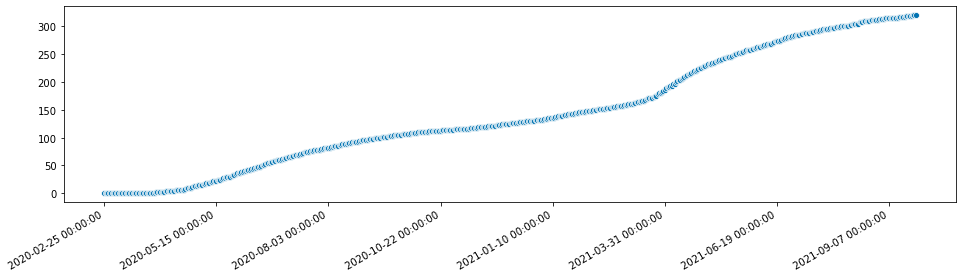

In [48]:
fig, ax = plot_series(data_ANALISE)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

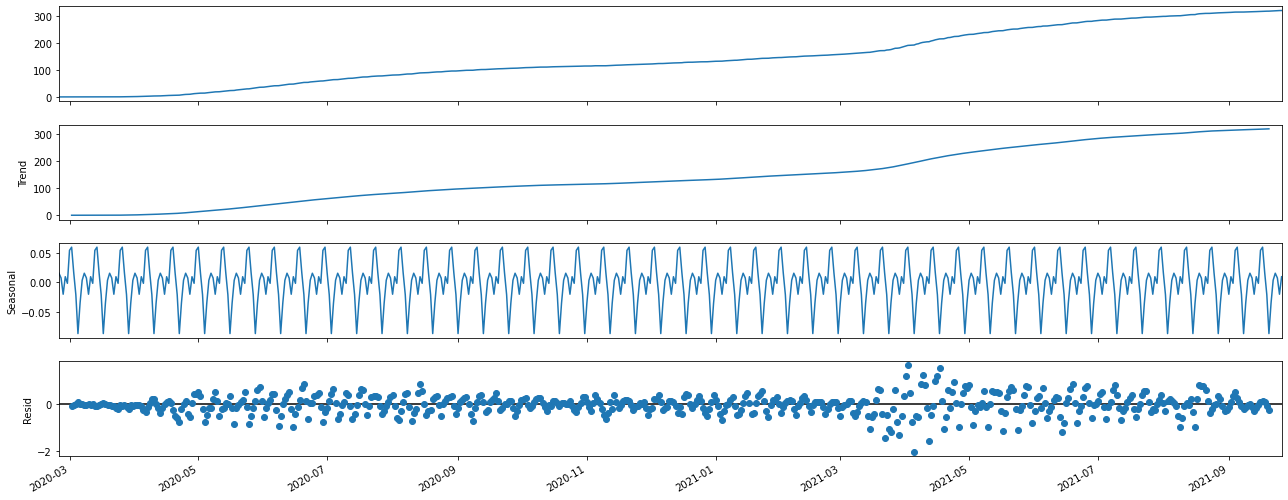

In [49]:
#decompondo a série temporal em seus componentes - curva, tendencia, sazonalidade, ruido
fig = seasonal_decompose(data_ANALISE,model="additive",period=12).plot()
fig.autofmt_xdate()
plt.show()

Pelo gráfico de crescimento e sua decomposição podemos confirmar as oscilações observadas no gráfico inicial de novos casos, com o forte crescimento no primeiro semestre de 2021. Vamos pegar um conjunto de treinamento menor para pegar o mínimo da oscilação ocorrida.

In [56]:
#vamos dividir a base de dados em treino e teste, e plotar para ver como ficou
y_train, y_test = temporal_train_test_split(pd.Series(data_ANALISE.values), test_size=0.33)

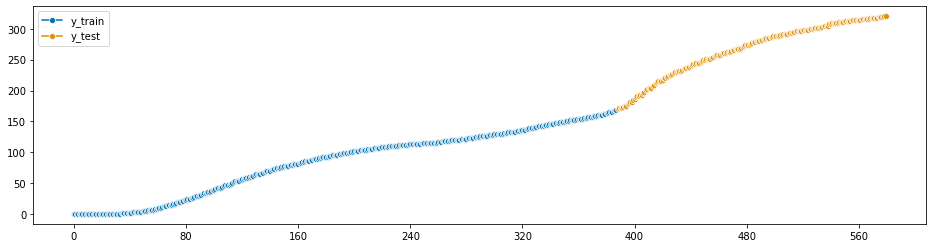

388 192


In [57]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()
print(y_train.shape[0], y_test.shape[0])

## Modelo Naive

In [72]:
fh_1 = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh_1)
naive = y_pred

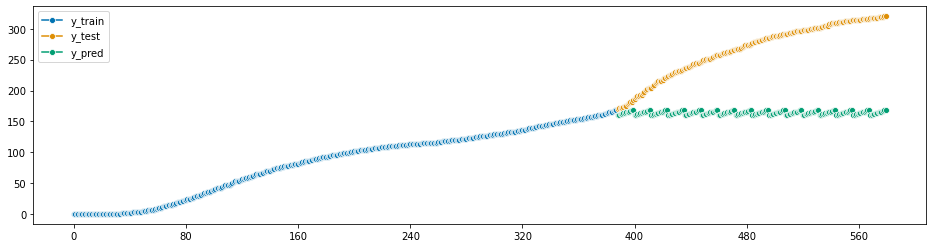

In [59]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

Como esperado, o modelo reflete de forma sazonal o crescimento do final do conjunto de treinamento, e não segue a tendência de crescimento. O erro percentual é menor, mas piora na medida POCID.

In [60]:
#abaixo podemos ver como ficou o erro
mean_absolute_percentage_error(y_test, y_pred)*100

45.610405886404955

In [63]:
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

1.0
92.14659685863874


## Modelo ARIMA

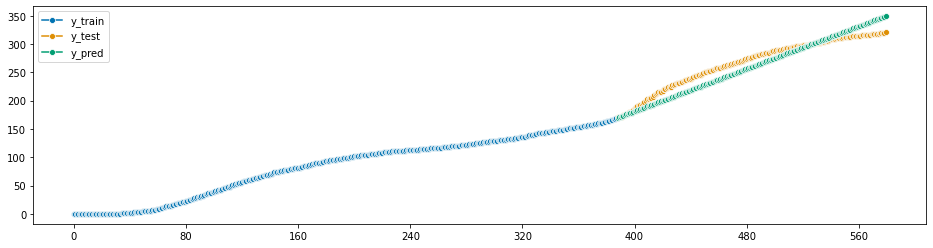

5.4048711771233275
0.020280014572912435
100.0


In [64]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

o ARIMA, que performou de forma bastante ruim nos dados diários, teve excelente performance no acumulado, confirmado pelo gráfico e pelos indicadores. 

## Modelo KNN - Regressão

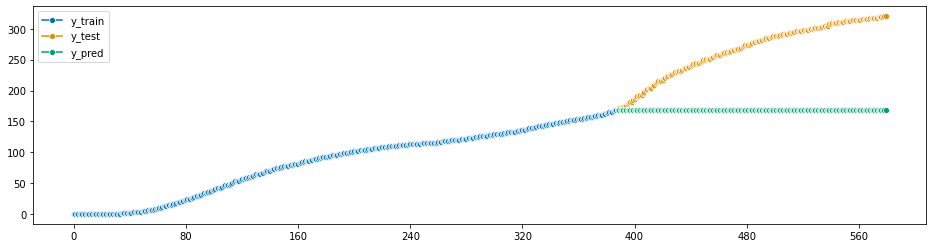

43.62564755113523
0.9435718843348825
0.0


In [66]:
regressor = KNeighborsRegressor(n_neighbors=3)
forecaster = make_reduction(regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

Este modelo novamente está próximo do Naive, com relação aos mínimos, com performance ligeiramente pior. Apliquemos o pipeline de previsão que preenche os dados vazios e elimina tendência e sazonalidade: notaremos uma sensível melhoria, diferente do que aconteceu no diário, seguindo a tendência da curva de treinamento.

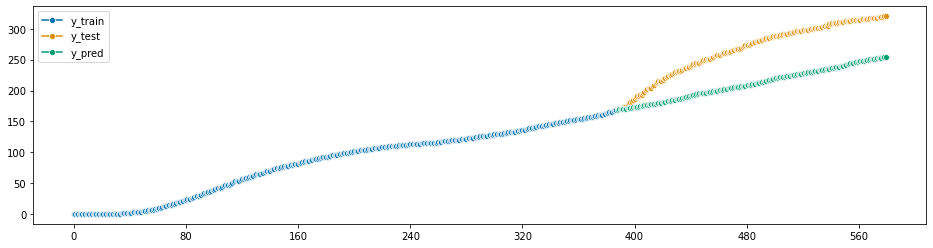

22.394279460377206
0.2798846705555366
98.95287958115183


In [69]:
forecaster = get_transformed_target_forecaster(KNeighborsRegressor())
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

## Regressão Linear (com pipeline)

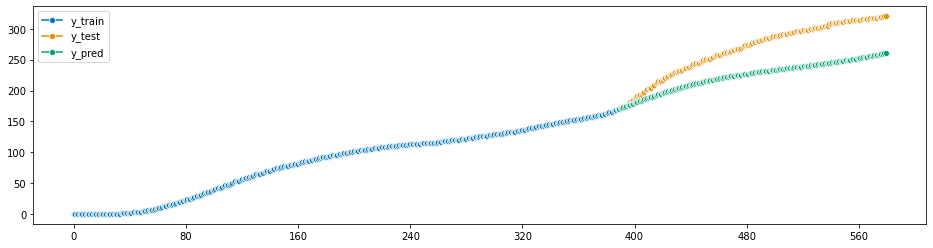

16.57270638036742
0.17861259614405692
100.0


In [70]:
forecaster = get_transformed_target_forecaster(LinearRegression())
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

Como no diário, trouxe sensível melhora.

## Random Forest (com pipeline)

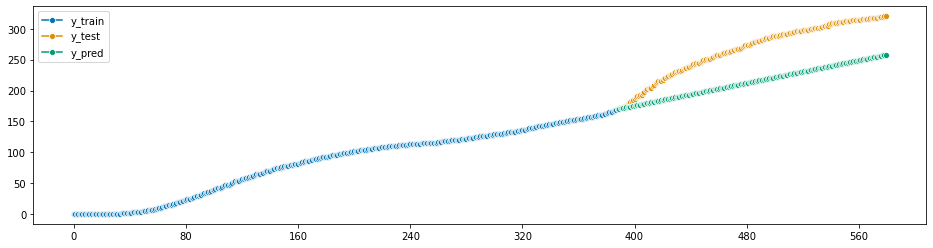

21.033261072551966
0.25395434109009407
100.0


In [71]:
forecaster = get_transformed_target_forecaster(RandomForestRegressor(random_state=14))
forecaster.fit(y_train)
y_pred = forecaster.predict(fh_1)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()
print(mean_absolute_percentage_error(y_test, y_pred)*100)
print(TU(y_test, y_pred, naive))
print(POCID(y_test, y_pred))

Agora observamos uma performance ligeiramente pior com relação a regressão linear com pipeline.

a curva de perda (erro) mostra uma forte queda depois fica constante.